In [1]:
#importing the necessary liberary
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
df=pd.read_csv("flightdatafinal1111.csv")
df

,Unnamed: 0,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Stops,Price
0,0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,Non Stop,"1,888"
1,1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,Non Stop,"1,888"
2,2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,Non Stop,"1,890"
3,3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,Non Stop,"1,890"
4,4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,Non Stop,"1,890"
...,...,...,...,...,...,...,...,...,...,...
1571,74,Vistara,New Delhi,24 Feb 2022,Kolkata,09:30,16:55,07 h 25 m,1 stop via Mumbai,"4,868"
1572,75,Vistara,New Delhi,24 Feb 2022,Kolkata,14:20,19:55,05 h 35 m,1 stop via Mumbai,"4,868"
1573,76,Vistara,New Delhi,24 Feb 2022,Kolkata,12:50,19:55,07 h 05 m,1 stop via Mumbai,"4,868"
1574,77,Spicejet,New Delhi,24 Feb 2022,Kolkata,09:25,14:20,04 h 55 m,1 stop via Bagdogra,"4,898"


The above dataset is the data of the Domestic flight fares collected from one of the most leading websites "www.yatra.com" and www.makemytrip.com" using the various webscrapping tools like beautifulsoup and selenium. The dataset consists of 1576 rows and around 9 features are scrapped from the above mnetioned site.
Features like Source, Destination, Duration, Date of journey Number of stops and price are collected. As we are supposed to predict the fares/price of the flight tickets, so price will be our output variable and features like Source, Destination, duration, Arrival time, Departure time, number of stops will be our independent features which will help us in predicting the price of the flights.


# Data Preprocessing/Data Cleaning

In [3]:
df.drop_duplicates(inplace=True) #droping the duplicate rows from the dataset

In [4]:
df

,Unnamed: 0,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Stops,Price
0,0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,Non Stop,"1,888"
1,1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,Non Stop,"1,888"
2,2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,Non Stop,"1,890"
3,3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,Non Stop,"1,890"
4,4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,Non Stop,"1,890"
...,...,...,...,...,...,...,...,...,...,...
1571,74,Vistara,New Delhi,24 Feb 2022,Kolkata,09:30,16:55,07 h 25 m,1 stop via Mumbai,"4,868"
1572,75,Vistara,New Delhi,24 Feb 2022,Kolkata,14:20,19:55,05 h 35 m,1 stop via Mumbai,"4,868"
1573,76,Vistara,New Delhi,24 Feb 2022,Kolkata,12:50,19:55,07 h 05 m,1 stop via Mumbai,"4,868"
1574,77,Spicejet,New Delhi,24 Feb 2022,Kolkata,09:25,14:20,04 h 55 m,1 stop via Bagdogra,"4,898"


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True) #droping the unnamed column as we already have index.

In [6]:
df

,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Stops,Price
0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,Non Stop,"1,888"
1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,Non Stop,"1,888"
2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,Non Stop,"1,890"
3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,Non Stop,"1,890"
4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,Non Stop,"1,890"
...,...,...,...,...,...,...,...,...,...
1571,Vistara,New Delhi,24 Feb 2022,Kolkata,09:30,16:55,07 h 25 m,1 stop via Mumbai,"4,868"
1572,Vistara,New Delhi,24 Feb 2022,Kolkata,14:20,19:55,05 h 35 m,1 stop via Mumbai,"4,868"
1573,Vistara,New Delhi,24 Feb 2022,Kolkata,12:50,19:55,07 h 05 m,1 stop via Mumbai,"4,868"
1574,Spicejet,New Delhi,24 Feb 2022,Kolkata,09:25,14:20,04 h 55 m,1 stop via Bagdogra,"4,898"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1576 entries, 0 to 1575
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1576 non-null   object
 1   Source           1576 non-null   object
 2   Date of Journey  1576 non-null   object
 3   Destination      1576 non-null   object
 4   Departure        1576 non-null   object
 5   Arrival          1576 non-null   object
 6   Duration         1576 non-null   object
 7   Stops            1576 non-null   object
 8   Price            1576 non-null   object
dtypes: object(9)
memory usage: 123.1+ KB


info() gives very importnat information regarding the dataset i.e it tells us if there are any null values and the data types of each row. As we can see above non of the row carries null values.

In [8]:
df.dtypes  #checking the data types of each row

Airline            object
Source             object
Date of Journey    object
Destination        object
Departure          object
Arrival            object
Duration           object
Stops              object
Price              object
dtype: object

In [9]:
df.Price = df.Price.str.replace(',', '').astype(int)

As the price is the output variable and its data type should of integer type so coverting the data type from object to integer.

In [10]:
df.dtypes

Airline            object
Source             object
Date of Journey    object
Destination        object
Departure          object
Arrival            object
Duration           object
Stops              object
Price               int32
dtype: object

In [11]:
df.head()

,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Stops,Price
0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,Non Stop,1888
1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,Non Stop,1888
2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,Non Stop,1890
3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,Non Stop,1890
4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,Non Stop,1890


In [12]:
df['stops'],df['place'] = df['Stops'].str.split('via',2).str
df.drop('Stops',axis=1,inplace=True)

As we have collected data from 2 different sites which is yatra and make my trip we can see that there is huge difference in both the sites of potraying the data. Number of stops column carry information of the layover and the route the flight is going to take before reaching the final destination. so seperating the number stops and the route.

In [13]:
df

,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Price,stops,place
0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,1888,Non Stop,NaN
1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,1888,Non Stop,NaN
2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,1890,Non Stop,NaN
3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,1890,Non Stop,NaN
4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,1890,Non Stop,NaN
...,...,...,...,...,...,...,...,...,...,...
1571,Vistara,New Delhi,24 Feb 2022,Kolkata,09:30,16:55,07 h 25 m,4868,1 stop,Mumbai
1572,Vistara,New Delhi,24 Feb 2022,Kolkata,14:20,19:55,05 h 35 m,4868,1 stop,Mumbai
1573,Vistara,New Delhi,24 Feb 2022,Kolkata,12:50,19:55,07 h 05 m,4868,1 stop,Mumbai
1574,Spicejet,New Delhi,24 Feb 2022,Kolkata,09:25,14:20,04 h 55 m,4898,1 stop,Bagdogra


In [14]:
df.drop('place', axis=1, inplace=True)

As the place/route doesnt play any important role we can drop the column.

In [15]:
df.rename(columns={'stops': 'Stops'}, inplace=True) #renaming the column name

In [16]:
df

,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Price,Stops
0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,1888,Non Stop
1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,1888,Non Stop
2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,1890,Non Stop
3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,1890,Non Stop
4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,1890,Non Stop
...,...,...,...,...,...,...,...,...,...
1571,Vistara,New Delhi,24 Feb 2022,Kolkata,09:30,16:55,07 h 25 m,4868,1 stop
1572,Vistara,New Delhi,24 Feb 2022,Kolkata,14:20,19:55,05 h 35 m,4868,1 stop
1573,Vistara,New Delhi,24 Feb 2022,Kolkata,12:50,19:55,07 h 05 m,4868,1 stop
1574,Spicejet,New Delhi,24 Feb 2022,Kolkata,09:25,14:20,04 h 55 m,4898,1 stop


In [17]:
columns=['Airline','Source','Date of Journey','Destination','Departure','Arrival','Duration','Stops','Price']
df=df.reindex(columns=columns)  #rearranging the columns in the dataset
df

,Airline,Source,Date of Journey,Destination,Departure,Arrival,Duration,Stops,Price
0,SpiceJet,Mumbai,8 Mar 2022,Chennai,19:30,21:20,1h 50m,Non Stop,1888
1,SpiceJet,Mumbai,8 Mar 2022,Chennai,06:00,08:00,2h 00m,Non Stop,1888
2,Go First,Mumbai,8 Mar 2022,Chennai,05:50,07:40,1h 50m,Non Stop,1890
3,IndiGo,Mumbai,8 Mar 2022,Chennai,16:25,18:15,1h 50m,Non Stop,1890
4,IndiGo,Mumbai,8 Mar 2022,Chennai,21:25,23:15,1h 50m,Non Stop,1890
...,...,...,...,...,...,...,...,...,...
1571,Vistara,New Delhi,24 Feb 2022,Kolkata,09:30,16:55,07 h 25 m,1 stop,4868
1572,Vistara,New Delhi,24 Feb 2022,Kolkata,14:20,19:55,05 h 35 m,1 stop,4868
1573,Vistara,New Delhi,24 Feb 2022,Kolkata,12:50,19:55,07 h 05 m,1 stop,4868
1574,Spicejet,New Delhi,24 Feb 2022,Kolkata,09:25,14:20,04 h 55 m,1 stop,4898


In [18]:
df['Airline'].value_counts() #counting the unique counts in the column airline

Vistara               458
Air India             373
IndiGo                356
Go First              197
Air Asia               97
SpiceJet               72
AirAsia                12
Spicejet                7
Vistara, IndiGo         2
Air India, AirAsia      1
IndiGo, AirAsia         1
Name: Airline, dtype: int64

In [19]:
values=['Vistara, IndiGo','Air India, AirAsia','IndiGo, AirAsia']
df = df[~df['Airline'].isin(values)] #droping multiple flight data

some of rows in the airline column shows multiple flights in a single column it becomes tough to categorise them in a single airline as the information of such filghts are very less so we can drop that data.

In [20]:
df['Airline'].value_counts()

Vistara      458
Air India    373
IndiGo       356
Go First     197
Air Asia      97
SpiceJet      72
AirAsia       12
Spicejet       7
Name: Airline, dtype: int64

Here we have two seperate data for Air Asia and spicejet we can merge them into same.

In [21]:
df['Airline']=df['Airline'].str.replace('AirAsia','Air Asia') #merging data having the same name

In [22]:
df['Airline']=df['Airline'].str.replace('Spicejet','SpiceJet') #merging the data having the same name

In [23]:
df['Airline'].value_counts()

Vistara      458
Air India    373
IndiGo       356
Go First     197
Air Asia     109
SpiceJet      79
Name: Airline, dtype: int64

In [24]:
df.shape

(1572, 9)

In [25]:
df['Date of Journey'].value_counts()  #unique values for date of journey

 24 Mar 2022    463
 23 Mar 2022    372
 2 Apr 2022     143
 1 Mar 2022     142
 19 Mar 2022    132
 8 Mar 2022     106
 18 Mar 2022     60
24 Feb 2022      43
 29 Mar 2022     40
 30 Mar 2022     39
28 Jan 2022      32
Name: Date of Journey, dtype: int64

In [26]:
df['Source'].value_counts()   #unique values for source i.e from where the flight take off

Mumbai        509
Bangalore     508
New Delhi     210
Chennai       194
Chandigarh    151
Name: Source, dtype: int64

In [27]:
df['Destination'].value_counts()  #unique values for destination i.e where the flight lands

Kolkata      501
New Delhi    374
Mumbai       254
Bangalore    225
Chennai      186
Bengaluru     32
Name: Destination, dtype: int64

In [28]:
df['Destination']=df['Destination'].str.replace('Bengaluru','Bangalore') #merging bangalore and bangaluru into same

In [29]:
df['Destination'].value_counts()

Kolkata      501
New Delhi    374
Bangalore    257
Mumbai       254
Chennai      186
Name: Destination, dtype: int64

In [30]:
df['Stops']=df['Stops'].str.strip() #striping off empty spaces

In [31]:
df['Stops'].value_counts()

1 Stop       1018
Non Stop      242
2 Stop(s)     217
1 stop         42
Non stop       28
3 Stop(s)      20
2 stop          5
Name: Stops, dtype: int64

In [32]:
df['Stops']=df['Stops'].str.replace('Non stop','Non Stop') #merging the same category of data

In [33]:
df['Stops']=df['Stops'].str.replace('1 stop','1 Stop') #merging the same category of data

In [34]:
df['Stops']=df['Stops'].str.replace('2 stop','2 Stop(s)')  #merging the same category of data

In [35]:
df['Stops'].value_counts()

1 Stop       1060
Non Stop      270
2 Stop(s)     222
3 Stop(s)      20
Name: Stops, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Airline', ylabel='count'>

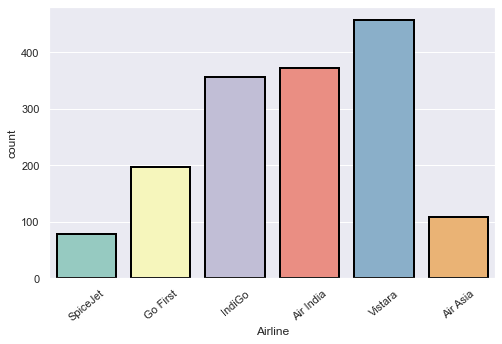

In [46]:
plt.figure(figsize=(8,5))  #adjusting the size of plot
plt.xticks(rotation=40) # for making the label in vertical direction
sns.set_theme(style='darkgrid')
sns.countplot(df['Airline'], palette="Set3", edgecolor='black', linewidth=2)

From the above plot we can see that the Vistara number of flights count is very high i.e majority of vistara flights are listed on the site fllowed by AirIndia then Indigo. Spicejet has least number of listed flights.

<AxesSubplot:xlabel='Source', ylabel='count'>

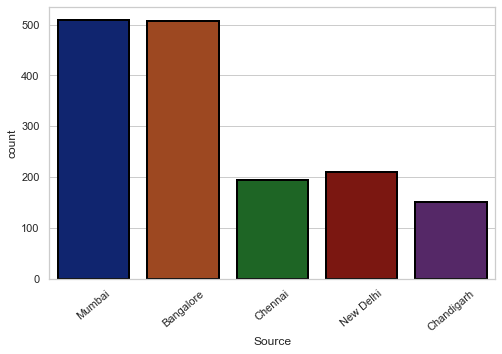

In [51]:
plt.figure(figsize=(8,5))  #adjusting the size of plot
plt.xticks(rotation=40) # for making the label in vertical direction
sns.set_theme(style='whitegrid')
sns.countplot(df['Source'], palette="dark", edgecolor='black', linewidth=2 )

Mumbai and Bangaluru airport followed by New Delhi has the highest number of flights taking off from the airport listed on the site. As these are the capital cities of india and the airports in these are listed among top 50 airports in the global list.

<AxesSubplot:xlabel='Destination', ylabel='count'>

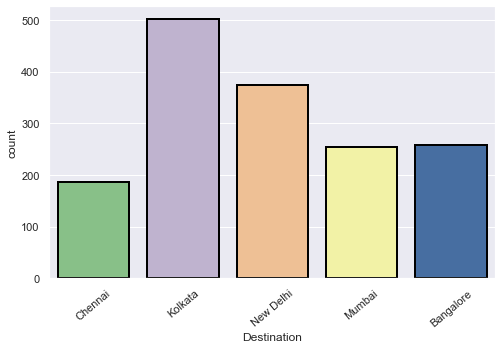

In [57]:
plt.figure(figsize=(8,5))  #adjusting the size of plot
plt.xticks(rotation=40) # for making the label in vertical direction
sns.set_theme(style='darkgrid')
sns.countplot(df['Destination'], palette="Accent", edgecolor='black', linewidth=2 )

From the data collected the majority of flights lands in Kolkata and new Delhi....

<AxesSubplot:xlabel='Date of Journey', ylabel='count'>

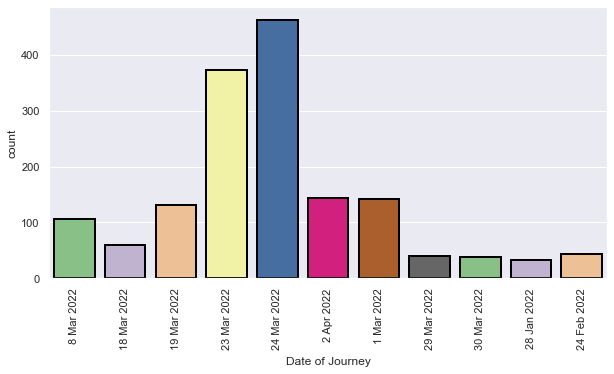

In [60]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
plt.xticks(rotation=90) # for making the label in vertical direction
sns.set_theme(style='darkgrid')
sns.countplot(df['Date of Journey'], palette="Accent", edgecolor='black', linewidth=2 )

Data collected for 23rd and 24th march have highest number of flights listed on the website.

<AxesSubplot:xlabel='Stops', ylabel='count'>

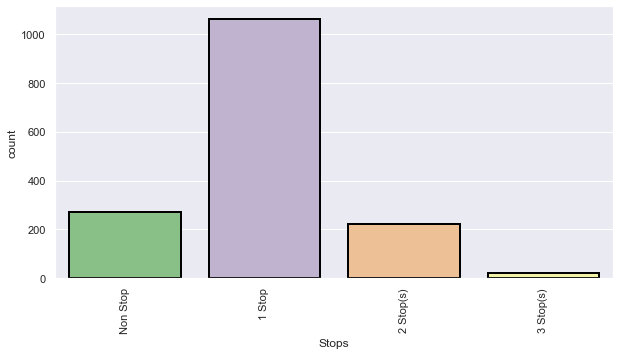

In [63]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
plt.xticks(rotation=90) # for making the label in vertical direction
sns.set_theme(style='dark')
sns.countplot(df['Stops'], palette="Accent", edgecolor='black', linewidth=2 )

Majority of the flights have 1 layover before reaching the final destination.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

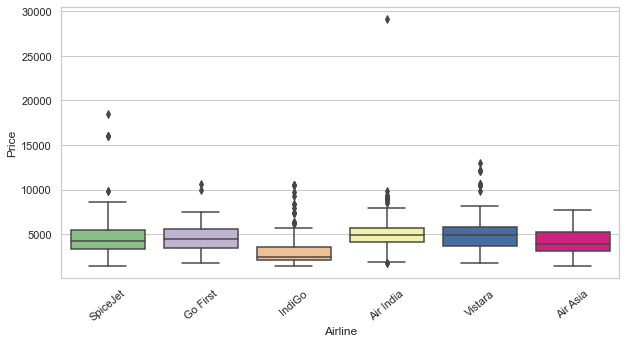

In [68]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
plt.xticks(rotation=40) # for making the label in vertical direction
sns.set_theme(style='whitegrid')
sns.boxplot(df['Airline'], df['Price'],palette="Accent" )

If we look at the above boxplot,
1. Indigo airlines offer the cheapest services as compare to any other airlines.
2. AirIndia has a flight fare which touches 30000.
3. AirIndia followed by Vistara is offering expensive services as comapre to other airlines.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

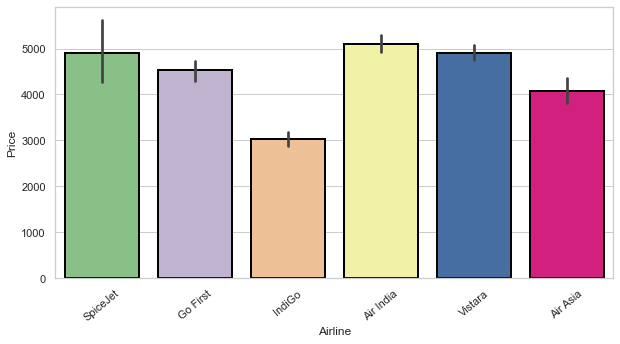

In [70]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
plt.xticks(rotation=40) # for making the label in vertical direction
sns.set_theme(style='whitegrid')
sns.barplot(df['Airline'],df['Price'], palette="Accent", edgecolor='black', linewidth=2)

The above data which was represnted in the boxplot format is represented in the barplot and we can see that indigo being the cheapest and airindia being the most expensive flight.

<AxesSubplot:xlabel='Date of Journey', ylabel='Price'>

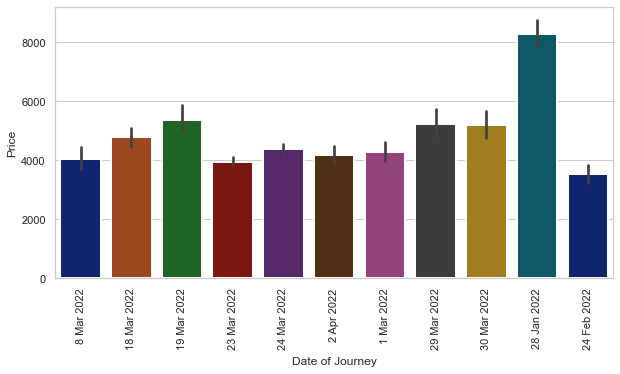

In [73]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
sns.set_theme(style='whitegrid')
plt.xticks(rotation=90)
sns.barplot(df['Date of Journey'],df['Price'],palette="dark", edgecolor='w', linewidth=2)

In the above barplot, 

1. As the date was approaching i.e 28th January the flight fares were most expensive for the same.
2. 19th march which is saturday, flights are expensive as compared weekdays even though the flights are listed in march month.
3. If we look at consecutive week days i.e 29th and 30th march there is no much difference in the change of price.
4. If we look at consecutive week days i.e 18th and 19th march which is weekend there is much difference in the change of price i.e price increases on weekends. 
5. Flights are cheaper on weekdays as compare to weekends.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

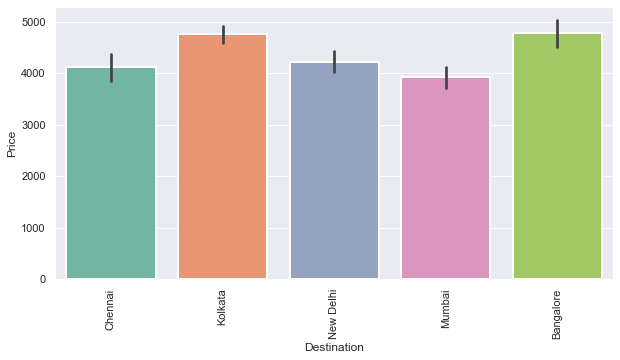

In [78]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
sns.barplot(df['Destination'],df['Price'],palette="Set2", edgecolor='w', linewidth=2)

In the above plot we can see that kolkata nad bengalore are the expensive destinations but other factors do come into picture like what is the source and the day on which we are booking the flights.

<AxesSubplot:xlabel='Source', ylabel='Price'>

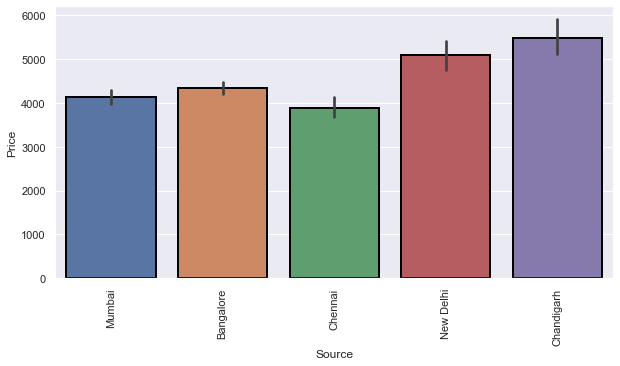

In [80]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
sns.barplot(df['Source'],df['Price'], edgecolor='black', linewidth=2)

Chnadigarh offers high flight prices as compare to other airport.

<AxesSubplot:xlabel='Stops', ylabel='Price'>

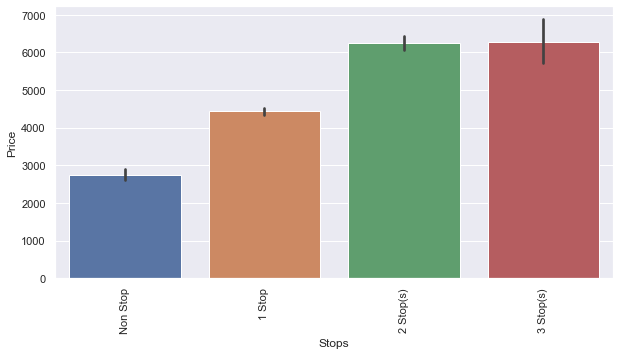

In [81]:
plt.figure(figsize=(10,5))  #adjusting the size of plot
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
sns.barplot(df['Stops'],df['Price'])

Flights with 2 and 3 layovers are expensive as compared to Non stop flights. But again we cannot conclude this from the above data as this is a very small data others factors like date of journey, source and destination.

<AxesSubplot:xlabel='Price', ylabel='Density'>

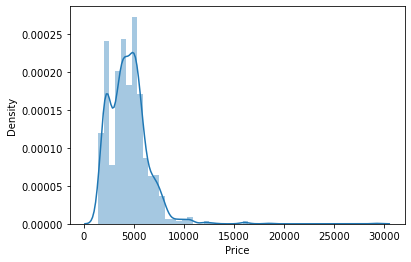

In [42]:
sns.distplot(df['Price'])

Distribution of price we can see that some of the flights are highly expensive which makes the presence of outliers and makes data skewed.

# Data Preprocessing/Data Cleaning

In [83]:
df['Date of Journey']=df['Date of Journey'].str.strip() #striping off the spaces.

In [84]:
df['Day'],df['Month'],df['Year'] = df['Date of Journey'].str.split(' ',3).str
df.drop('Date of Journey',axis=1,inplace=True)  

extracting data from the column i.e creating seperate column for month year and date.

In [85]:
df.head()

,Airline,Source,Destination,Departure,Arrival,Duration,Stops,Price,Day,Month,Year
0,SpiceJet,Mumbai,Chennai,19:30,21:20,1h 50m,Non Stop,1888,8,Mar,2022
1,SpiceJet,Mumbai,Chennai,06:00,08:00,2h 00m,Non Stop,1888,8,Mar,2022
2,Go First,Mumbai,Chennai,05:50,07:40,1h 50m,Non Stop,1890,8,Mar,2022
3,IndiGo,Mumbai,Chennai,16:25,18:15,1h 50m,Non Stop,1890,8,Mar,2022
4,IndiGo,Mumbai,Chennai,21:25,23:15,1h 50m,Non Stop,1890,8,Mar,2022


In [86]:
df['Dep_h'],df['Dep_m']=df['Departure'].str.split(':',2).str
df.drop('Departure',axis=1,inplace=True) #extracting minutes and hours from the departure

In [87]:
df.head()

,Airline,Source,Destination,Arrival,Duration,Stops,Price,Day,Month,Year,Dep_h,Dep_m
0,SpiceJet,Mumbai,Chennai,21:20,1h 50m,Non Stop,1888,8,Mar,2022,19,30
1,SpiceJet,Mumbai,Chennai,08:00,2h 00m,Non Stop,1888,8,Mar,2022,06,00
2,Go First,Mumbai,Chennai,07:40,1h 50m,Non Stop,1890,8,Mar,2022,05,50
3,IndiGo,Mumbai,Chennai,18:15,1h 50m,Non Stop,1890,8,Mar,2022,16,25
4,IndiGo,Mumbai,Chennai,23:15,1h 50m,Non Stop,1890,8,Mar,2022,21,25


In [88]:
df['Arr_h'],df['Arr_m']=df['Arrival'].str.split(':',2).str
df.drop('Arrival',axis=1,inplace=True) #extracting hours and minutes from the arrival

In [89]:
df.head()

,Airline,Source,Destination,Duration,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Arr_m
0,SpiceJet,Mumbai,Chennai,1h 50m,Non Stop,1888,8,Mar,2022,19,30,21,20
1,SpiceJet,Mumbai,Chennai,2h 00m,Non Stop,1888,8,Mar,2022,06,00,08,00
2,Go First,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,05,50,07,40
3,IndiGo,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,16,25,18,15
4,IndiGo,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,21,25,23,15


In [90]:
df['duration'] = df['Duration'].str.replace('h',':').str.replace('m','') #replacing hour and minute from the duration 

In [91]:
df.head()

,Airline,Source,Destination,Duration,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Arr_m,duration
0,SpiceJet,Mumbai,Chennai,1h 50m,Non Stop,1888,8,Mar,2022,19,30,21,20,1: 50
1,SpiceJet,Mumbai,Chennai,2h 00m,Non Stop,1888,8,Mar,2022,06,00,08,00,2: 00
2,Go First,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,05,50,07,40,1: 50
3,IndiGo,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,16,25,18,15,1: 50
4,IndiGo,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,21,25,23,15,1: 50


In [92]:
df['Dur_h'],df['Dur_m']=df['duration'].str.split(':',2).str #extracting hours and minutes from duration

In [93]:
df.head()

,Airline,Source,Destination,Duration,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Arr_m,duration,Dur_h,Dur_m
0,SpiceJet,Mumbai,Chennai,1h 50m,Non Stop,1888,8,Mar,2022,19,30,21,20,1: 50,1,50
1,SpiceJet,Mumbai,Chennai,2h 00m,Non Stop,1888,8,Mar,2022,06,00,08,00,2: 00,2,00
2,Go First,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,05,50,07,40,1: 50,1,50
3,IndiGo,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,16,25,18,15,1: 50,1,50
4,IndiGo,Mumbai,Chennai,1h 50m,Non Stop,1890,8,Mar,2022,21,25,23,15,1: 50,1,50


In [94]:
df.drop('duration',axis=1,inplace=True)
df.drop('Duration',axis=1,inplace=True)

In [95]:
df.head()

,Airline,Source,Destination,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Arr_m,Dur_h,Dur_m
0,SpiceJet,Mumbai,Chennai,Non Stop,1888,8,Mar,2022,19,30,21,20,1,50
1,SpiceJet,Mumbai,Chennai,Non Stop,1888,8,Mar,2022,06,00,08,00,2,00
2,Go First,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,05,50,07,40,1,50
3,IndiGo,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,16,25,18,15,1,50
4,IndiGo,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,21,25,23,15,1,50


In [96]:
df.dtypes

Airline        object
Source         object
Destination    object
Stops          object
Price           int32
Day            object
Month          object
Year           object
Dep_h          object
Dep_m          object
Arr_h          object
Arr_m          object
Dur_h          object
Dur_m          object
dtype: object

In [97]:
df['Dur_m'].replace(r'',np.NaN,inplace=True) #replacing empty spaces with nan spaces

In [98]:
df.isnull().sum() #checking the null values

Airline        0
Source         0
Destination    0
Stops          0
Price          0
Day            0
Month          0
Year           0
Dep_h          0
Dep_m          0
Arr_h          0
Arr_m          0
Dur_h          0
Dur_m          7
dtype: int64

In [99]:
df['Dur_m'].fillna(0,inplace=True) #filling the nan values with 0

In [100]:
df['arr_m'],df['day'] = df['Arr_m'].str.split('+',2).str
df.drop('Arr_m',axis=1,inplace=True)  # making column from arrival to seperate time and days

In [101]:
df

,Airline,Source,Destination,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Dur_h,Dur_m,arr_m,day
0,SpiceJet,Mumbai,Chennai,Non Stop,1888,8,Mar,2022,19,30,21,1,50,20,NaN
1,SpiceJet,Mumbai,Chennai,Non Stop,1888,8,Mar,2022,06,00,08,2,00,00,NaN
2,Go First,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,05,50,07,1,50,40,NaN
3,IndiGo,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,16,25,18,1,50,15,NaN
4,IndiGo,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,21,25,23,1,50,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,Vistara,New Delhi,Kolkata,1 Stop,4868,24,Feb,2022,09,30,16,07,25,55,NaN
1572,Vistara,New Delhi,Kolkata,1 Stop,4868,24,Feb,2022,14,20,19,05,35,55,NaN
1573,Vistara,New Delhi,Kolkata,1 Stop,4868,24,Feb,2022,12,50,19,07,05,55,NaN
1574,SpiceJet,New Delhi,Kolkata,1 Stop,4898,24,Feb,2022,09,25,14,04,55,20,NaN


In [102]:
df.drop('day',axis=1,inplace=True) #drop the day column as it gives no information

In [103]:
df.head()

,Airline,Source,Destination,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Dur_h,Dur_m,arr_m
0,SpiceJet,Mumbai,Chennai,Non Stop,1888,8,Mar,2022,19,30,21,1,50,20
1,SpiceJet,Mumbai,Chennai,Non Stop,1888,8,Mar,2022,06,00,08,2,00,00
2,Go First,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,05,50,07,1,50,40
3,IndiGo,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,16,25,18,1,50,15
4,IndiGo,Mumbai,Chennai,Non Stop,1890,8,Mar,2022,21,25,23,1,50,15


# Type Casting

In [104]:
df['Day']=df['Day'].astype(int)   #coverting the object data type into integer.
df['Year']=df['Year'].astype(int)
df['Dep_h']=df['Dep_h'].astype(int)
df['Dep_m']=df['Dep_m'].astype(int)
df['Dur_h']=df['Dur_h'].astype(int)
df['Dur_m']=df['Dur_m'].astype(int)
df['Arr_h']=df['Arr_h'].astype(int)
df['arr_m']=df['arr_m'].astype(int)

In [105]:
df.dtypes

Airline        object
Source         object
Destination    object
Stops          object
Price           int32
Day             int32
Month          object
Year            int32
Dep_h           int32
Dep_m           int32
Arr_h           int32
Dur_h           int32
Dur_m           int32
arr_m           int32
dtype: object

# Label Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() #converting the categorial data into numeric data
name=['Airline','Source','Destination','Stops','Month']
for val in name:
    df[val]=le.fit_transform(df[val].astype(str))


In [107]:
df.head()

,Airline,Source,Destination,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Dur_h,Dur_m,arr_m
0,4,3,1,3,1888,8,3,2022,19,30,21,1,50,20
1,4,3,1,3,1888,8,3,2022,6,0,8,2,0,0
2,2,3,1,3,1890,8,3,2022,5,50,7,1,50,40
3,3,3,1,3,1890,8,3,2022,16,25,18,1,50,15
4,3,3,1,3,1890,8,3,2022,21,25,23,1,50,15


In [108]:
df.describe() 

,Airline,Source,Destination,Stops,Price,Day,Month,Year,Dep_h,Dep_m,Arr_h,Dur_h,Dur_m,arr_m
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.0,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,2.825064,1.848601,2.192112,0.681934,4424.307252,18.314249,2.652036,2022.0,12.606234,26.949746,15.150127,9.969466,26.962468,28.606870
std,1.698633,1.491748,1.360061,1.128579,1948.878044,9.075494,0.909902,0.0,5.300352,18.541660,6.230894,7.116228,17.802953,18.220466
min,0.000000,0.000000,0.000000,0.000000,1442.000000,1.000000,0.000000,2022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,3229.750000,18.000000,3.000000,2022.0,8.000000,10.000000,10.000000,5.000000,10.000000,10.000000
50%,3.000000,2.000000,2.000000,0.000000,4298.000000,23.000000,3.000000,2022.0,12.000000,30.000000,17.000000,8.000000,25.000000,30.000000
75%,5.000000,3.000000,3.000000,1.000000,5321.000000,24.000000,3.000000,2022.0,18.000000,45.000000,20.000000,13.000000,45.000000,45.000000
max,5.000000,4.000000,4.000000,3.000000,29147.000000,30.000000,3.000000,2022.0,23.000000,55.000000,23.000000,37.000000,55.000000,55.000000


from the above statistical summary we can say that,
1. There are 1572 counts no null values
2. As there is no much differnce between the max value and 75% no presence of outliers are less but in price we can see there is huge difference which shows some flights are highly expensive and makes the data skewed.

<AxesSubplot:xlabel='Dep_h', ylabel='Price'>

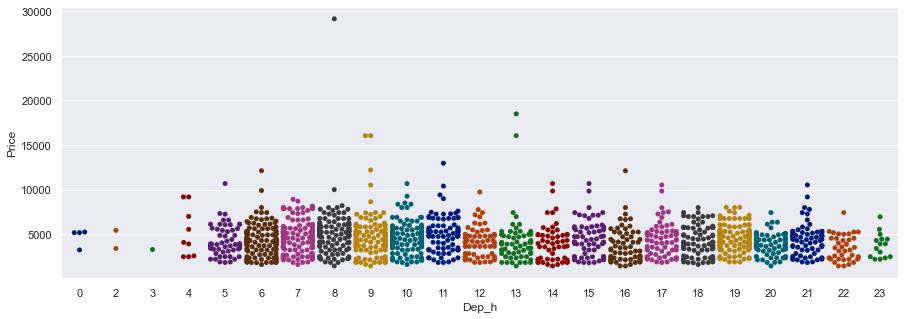

In [116]:
plt.figure(figsize=(15,5))
sns.swarmplot(y='Price',x='Dep_h',data=df, palette="dark")

From the above plot we say that, the flights that depart at 7am to 11am are expensive whereas the flights that depart late night are cheaper.

<AxesSubplot:xlabel='Arr_h', ylabel='Price'>

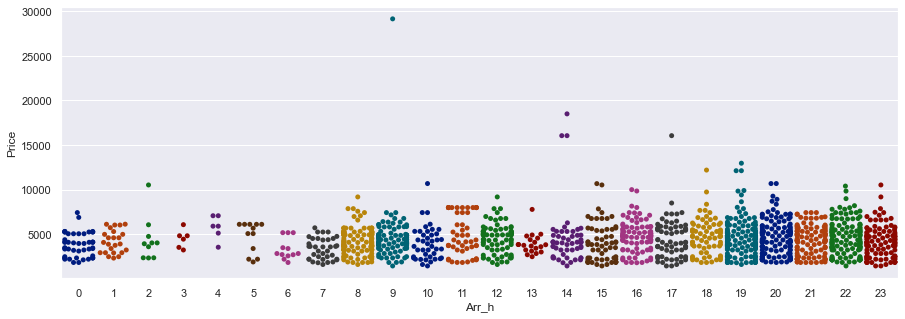

In [117]:
plt.figure(figsize=(15,5))
sns.swarmplot(y='Price',x='Arr_h',data=df, palette="dark")

From the above plot we can say that flights that arrive between 2pm to 7pm are expensive.

<AxesSubplot:xlabel='Dur_h', ylabel='Price'>

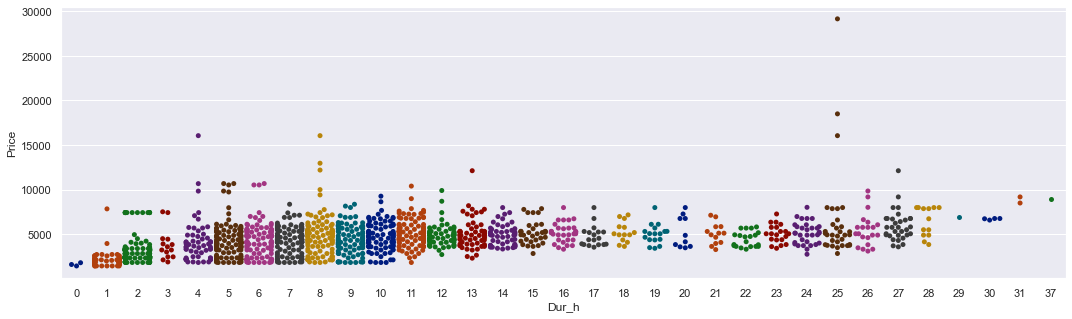

In [119]:
plt.figure(figsize=(18,5))
sns.swarmplot(y='Price',x='Dur_h',data=df, palette="dark")

If the duration of the flight is between 4 to 8 hours then the flight may cost expensive.

<AxesSubplot:>

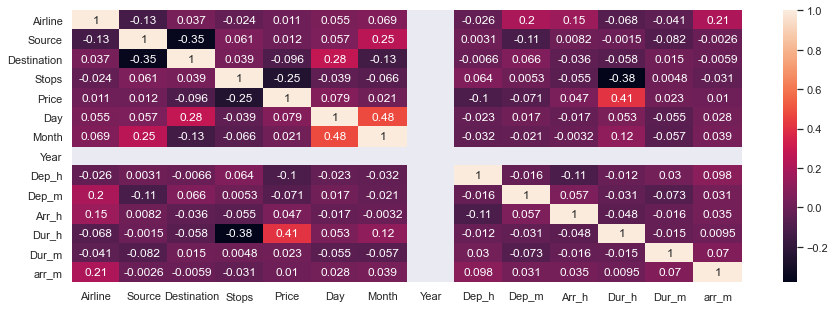

In [110]:
plt.figure(figsize=(15,5))  #adjusting the size of plot
sns.heatmap(df.corr(),annot=True)

In the above heatmap,
1. Duration hour is contributing positively in predicting the price.
2. Stops is contributing least in predicting the price.
3. duration and stops are negetively co related.

Airline           AxesSubplot(0.125,0.772143;0.0824468x0.107857)
Source         AxesSubplot(0.223936,0.772143;0.0824468x0.107857)
Destination    AxesSubplot(0.322872,0.772143;0.0824468x0.107857)
Stops          AxesSubplot(0.421809,0.772143;0.0824468x0.107857)
Price          AxesSubplot(0.520745,0.772143;0.0824468x0.107857)
Day            AxesSubplot(0.619681,0.772143;0.0824468x0.107857)
Month          AxesSubplot(0.718617,0.772143;0.0824468x0.107857)
Year           AxesSubplot(0.817553,0.772143;0.0824468x0.107857)
Dep_h             AxesSubplot(0.125,0.642714;0.0824468x0.107857)
Dep_m          AxesSubplot(0.223936,0.642714;0.0824468x0.107857)
Arr_h          AxesSubplot(0.322872,0.642714;0.0824468x0.107857)
Dur_h          AxesSubplot(0.421809,0.642714;0.0824468x0.107857)
Dur_m          AxesSubplot(0.520745,0.642714;0.0824468x0.107857)
arr_m          AxesSubplot(0.619681,0.642714;0.0824468x0.107857)
dtype: object

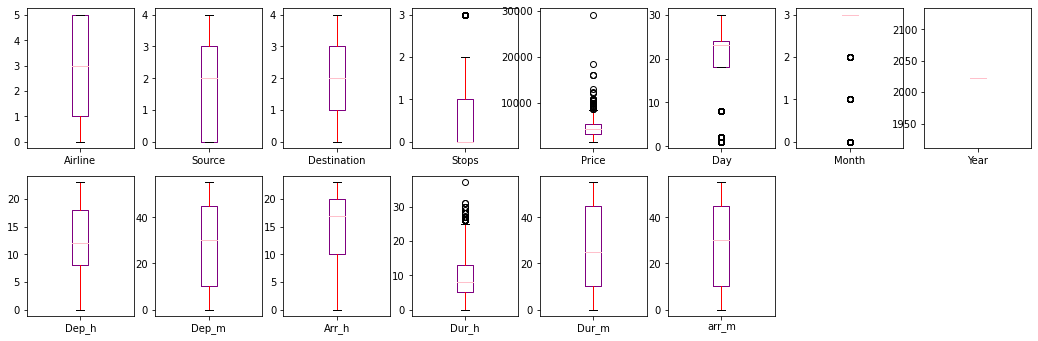

In [70]:
color=dict(boxes="Purple",whiskers="Red",medians="Pink",caps="Black")
df.plot(kind="box",subplots=True,layout=(6,8),figsize=(18,18),color=color)

To check the presence of outliers we can use boxplot and we can see that price has some outliers as it is our target variable we will try to build model based on it.

In [71]:
df.skew() #checking the skewness

Airline        0.000822
Source        -0.083073
Destination   -0.172769
Stops          1.365583
Price          2.430315
Day           -1.025598
Month         -2.379939
Year           0.000000
Dep_h          0.217604
Dep_m         -0.022541
Arr_h         -0.668597
Dur_h          0.964542
Dur_m          0.001303
arr_m         -0.080130
dtype: float64

As we can see that the data is slightly skewed we will try to remove skewness using power transformation method. W e can also get rid of skewness by removing outliers but we will not remove the outliers as by doing so we may losse inportant information.

# Dividing the dataset into Independent and Dependent Variable

In [72]:
x=df.drop("Price",axis=1)   #input variables
x

,Airline,Source,Destination,Stops,Day,Month,Year,Dep_h,Dep_m,Arr_h,Dur_h,Dur_m,arr_m
0,4,3,1,3,8,3,2022,19,30,21,1,50,20
1,4,3,1,3,8,3,2022,6,0,8,2,0,0
2,2,3,1,3,8,3,2022,5,50,7,1,50,40
3,3,3,1,3,8,3,2022,16,25,18,1,50,15
4,3,3,1,3,8,3,2022,21,25,23,1,50,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,5,4,2,0,24,1,2022,9,30,16,7,25,55
1572,5,4,2,0,24,1,2022,14,20,19,5,35,55
1573,5,4,2,0,24,1,2022,12,50,19,7,5,55
1574,4,4,2,0,24,1,2022,9,25,14,4,55,20


In [73]:
y=df['Price']  #output variables.
y

0       1888
1       1888
2       1890
3       1890
4       1890
        ... 
1571    4868
1572    4868
1573    4868
1574    4898
1575    5692
Name: Price, Length: 1572, dtype: int32

In [74]:
import statsmodels.api as sm    #cecking the multicolinearities.
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [75]:
cal_vif(x)

,variables,VIF FACTOR
0,Airline,1.146680
1,Source,1.261789
2,Destination,1.367199
3,Stops,1.190980
4,Day,1.546918
5,Month,1.503054
6,Year,13.292392
7,Dep_h,1.028439
8,Dep_m,1.057720
9,Arr_h,1.045692


As we can see that no multicollinearties exists.

In [76]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')  #to remove skewness
x

array([[ 0.7158495 ,  0.79442541, -0.87013951, ..., -1.83781077,
         1.18388888, -0.33701372],
       [ 0.7158495 ,  0.79442541, -0.87013951, ..., -1.41983078,
        -1.81153673, -1.83201552],
       [-0.42089444,  0.79442541, -0.87013951, ..., -1.83781077,
         1.18388888,  0.66161971],
       ...,
       [ 1.23292025,  1.32758666, -0.13018167, ..., -0.21231018,
        -1.25089399,  1.3097045 ],
       [ 0.7158495 ,  1.32758666, -0.13018167, ..., -0.82835665,
         1.38613279, -0.33701372],
       [-0.42089444,  1.32758666, -0.13018167, ..., -0.82835665,
         0.7567815 ,  1.10047072]])

In [77]:
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()  #bringing all the columns on smae scale.
x=mn.fit_transform(x)
x

array([[ 0.7158495 ,  0.79442541, -0.87013951, ..., -1.83781077,
         1.18388888, -0.33701372],
       [ 0.7158495 ,  0.79442541, -0.87013951, ..., -1.41983078,
        -1.81153673, -1.83201552],
       [-0.42089444,  0.79442541, -0.87013951, ..., -1.83781077,
         1.18388888,  0.66161971],
       ...,
       [ 1.23292025,  1.32758666, -0.13018167, ..., -0.21231018,
        -1.25089399,  1.3097045 ],
       [ 0.7158495 ,  1.32758666, -0.13018167, ..., -0.82835665,
         1.38613279, -0.33701372],
       [-0.42089444,  1.32758666, -0.13018167, ..., -0.82835665,
         0.7567815 ,  1.10047072]])

# Building Regression Models

In [78]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [79]:
minmse=0    #finding the best Random State
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    err=mean_squared_error(y_test,pred)
    if err>minmse:
        minmse=err
        maxrs=i
print("MSE is ",round(minmse,2),"at random state",maxrs)

MSE is  4184839.63 at random state 70


In [80]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=.30,random_state=70)

# Linear Regression

In [81]:
lr=LinearRegression()
lr.fit(x_train1,y_train1)
#print("Cofficient is:",lr.coef_)
#print("Intercept is: ",lr.intercept_)
sco=lr.score(x_train1,y_train1)
sco1=sco*100
print("Score is: ",sco1)
pred=lr.predict(x_test1)
mse=mean_squared_error(y_test1,pred)
print("Mean Squared Error is: ",round(mse,2))
abse=mean_absolute_error(y_test1,pred)
print("Mean Absolute Error is: ",round(abse,2))
scr=r2_score(y_test1,pred)
print("R2 Score is: ",round(scr,2))
print("rsme",np.sqrt(mse))

Score is:  29.957452598395907
Mean Squared Error is:  4184839.63
Mean Absolute Error is:  1234.04
R2 Score is:  0.2
rsme 2045.6880583579657


# K neighbors Regressor

In [82]:
knr=KNeighborsRegressor()
knr.fit(x_train1,y_train1)
sw=knr.score(x_train1,y_train1)
#print("Coffecient is: ",knr.coef_)
#print("Intercept is: ",knr.intercept_)
print("Score is: ",sw)
pred=knr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.6322084952833402
Mean Squared Error is: 3526786.56
Mean Absolute Error is: 998.97
R2 Score is: 0.32
RSME 1877.9740579605675


# Support Vector Regressor

In [83]:
ker=["rbf","poly","linear"]    #finding the best kernel
for i in ker:
    svr=SVR(kernel=i)
    svr.fit(x_train1,y_train1)
    pred=svr.predict(x_test1)
    print("For",i,"Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
    print("For",i,"Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
    print("For",i,"R2 Score is:",round(r2_score(y_test1,pred),2))
    print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

For rbf Mean Squared Error is: 5200864.51
For rbf Mean Absolute Error is: 1472.85
For rbf R2 Score is: 0.0
RSME 2280.5403994594117
For poly Mean Squared Error is: 5190798.57
For poly Mean Absolute Error is: 1470.02
For poly R2 Score is: 0.0
RSME 2278.3324098063968
For linear Mean Squared Error is: 4759393.91
For linear Mean Absolute Error is: 1311.83
For linear R2 Score is: 0.09
RSME 2181.6035185926257


In [84]:
svr=SVR(kernel='linear')
svr.fit(x_train1,y_train1)
pred=svr.predict(x_test1)
print("For",i,"Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("For",i,"Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("For",i,"R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

For linear Mean Squared Error is: 4759393.91
For linear Mean Absolute Error is: 1311.83
For linear R2 Score is: 0.09
RSME 2181.6035185926257


# Decision Tree Regressor

In [85]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train1,y_train1)
sw1=dtr.score(x_train1,y_train1)
#print("Coffecient is: ",dtr.coef_)
#print("Intercept is: ",dtr.intercept_)
print("Score is: ",sw1)
pred=dtr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))


Score is:  0.999951605569075
Mean Squared Error is: 3415656.81
Mean Absolute Error is: 751.08
R2 Score is: 0.34
RSME 1848.149564142653


# Lasso Regressor

In [86]:
ls1=Lasso(alpha=0.001)   #choosing the best alpha
ls1.fit(x_train1,y_train1)
sw=ls1.score(x_train1,y_train1)
#print("Coffecient is: ",ls1.coef_)
#print("Intercept is: ",ls1.intercept_)
print("Score is: ",sw)
pred=ls1.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))

Score is:  0.2995745259781496
Mean Squared Error is: 4184840.57
Mean Absolute Error is: 1234.04
R2 Score is: 0.2
RSME 2045.6882879242264


# Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rfr=RandomForestRegressor()
rfr.fit(x_train1,y_train1)
sw1=rfr.score(x_train1,y_train1)
#print("Coffecient is: ",rfr.coef_)
#print("Intercept is: ",rfr.intercept_)
print("Score is: ",sw1)
pred=rfr.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))


Score is:  0.9476647267607949
Mean Squared Error is: 2785667.5
Mean Absolute Error is: 698.39
R2 Score is: 0.46
RSME 1669.0319036884375


# Cross Validating the Results

In [89]:
def rmse_cv(model,x_train1,y_train1):
    mse_cv_score=-cross_val_score(model,x_train1,y_train1,cv=5,scoring="neg_mean_squared_error",n_jobs=-1)
    rmse_cv=np.sqrt(mse_cv_score).mean()
    return(rmse_cv)

In [90]:
rmse_cv(lr,x_train1,y_train1)   #linear regression

1510.880464870581

In [91]:
rmse_cv(rfr,x_train1,y_train1) #Random Forest Regressor

1101.5839454772795

In [92]:
rmse_cv(dtr,x_train1,y_train1) #Decision Tree Regressor

1505.8164274349906

In [93]:
rmse_cv(knr,x_train1,y_train1) #K Neighbors Regressor

1382.876110974888

In [94]:
rmse_cv(ls1,x_train1,y_train1) #Lasso Regressor

1510.8803761563279

In [95]:
rmse_cv(svr,x_train1,y_train1) #Support Vector Regressor

1644.6679794744184

on the comparing the RMSE for the above models we can see that random Forest Regressor is giving us the best results with the RMSE being less and on cross validating we are getting the least results.

# Hyper Parameter Tunning

In [96]:
parameter={"criterion":['squared_error', 'absolute_error', 'poisson'],
           "max_depth":np.arange(2,20),
          "max_features":["auto","log2","sqrt"],
          "bootstrap":[True,False],
          "oob_score":[True,False]}

In [97]:
gcv=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [98]:
gcv.fit(x_train1,y_train1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'oob_score': [True, False]})

In [99]:
gcv.best_params_ 

{'bootstrap': False,
 'criterion': 'poisson',
 'max_depth': 19,
 'max_features': 'log2',
 'oob_score': False}

In [106]:
final=RandomForestRegressor(max_depth=19, max_features='log2', oob_score=False,bootstrap=False)
final.fit(x_train1,y_train1)
sw1=final.score(x_train1,y_train1)
#print("Coffecient is: ",rfr.coef_)
#print("Intercept is: ",rfr.intercept_)
print("Score is: ",sw1)
pred=final.predict(x_test1)
print("Mean Squared Error is:",round(mean_squared_error(y_test1,pred),2))
print("Mean Absolute Error is:",round(mean_absolute_error(y_test1,pred),2))
print("R2 Score is:",round(r2_score(y_test1,pred),2))
print("RSME",np.sqrt(mean_squared_error(y_test1,pred)))


Score is:  0.9999172088394229
Mean Squared Error is: 2618141.9
Mean Absolute Error is: 691.06
R2 Score is: 0.5
RSME 1618.0673336561476


# Saving the Model.

In [107]:
import joblib
joblib.dump(final,"flightpricedata.pkl")

['flightpricedata.pkl']